Reading the data from csv into a data frame

In [3]:
dataDF <- read.csv(file="D:/MS_Spring2017/DIC/Lab2/June 10-July 12, 2015 - Gaming, Jobs and Broadband/June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv",
         head=TRUE,sep=",")

Data had 2001 records and 140 columns

In [350]:
nrow(dataDF)
length(dataDF)

[1] 2001

[1] 140

In [351]:
library(sqldf)

List of all the columns in the data frame

In [13]:
colnames(dataDF)

[1] "ï..psraid"  "sample"     "int_date"   "lang"       "usr"       
  [6] "cregion"    "state"      "form"       "sex"        "q1"        
 [11] "q3"         "eminuse"    "intmob"     "intfreq"    "home4nw"   
 [16] "bbhome1"    "bbhome2"    "bbhome3a"   "bbhome3b"   "bbhome3c"  
 [21] "bbhome3d"   "bbhome3e"   "device1a"   "smart1"     "q4"        
 [26] "bbsmart1"   "bbsmart2"   "bbsmart3a"  "bbsmart3b"  "bbsmart3c" 
 [31] "bbsmart3d"  "bbsmart3e"  "bbsmart3f"  "bbsmart4"   "cable1"    
 [36] "cable2"     "cable3a"    "cable3b"    "cable3c"    "act19"     
 [41] "act87a"     "act87b"     "act137"     "q5a"        "q5b"       
 [46] "q5c"        "q5d"        "q5e"        "q5f"        "date1a"    
 [51] "date2a"     "date3a"     "date3b"     "date4a"     "date4b"    
 [56] "date4c"     "date4d"     "date4e"     "date4f"     "game1"     
 [61] "game2a"     "game2b"     "game2c"     "game2d"     "game2e"    
 [66] "game2f"     "game3a"     "game3b"     "game4"      "emplnw"    
 [71] "emptype1"   "emptype2"   "emptype3"   "stud"       "job1a"     
 [76] "job1b"      "job1c"      "job1d"      "job1e"      "job1f"     
 [81] "job2"       "job3a"      "job3b"      "job3c"      "job3d"     
 [86] "job3e"      "job3f"      "job3g"      "job3h"      "job4"      
 [91] "smjob1"     "smjob2a"    "smjob2b"    "smjob2c"    "smjob2d"   
 [96] "smjob2e"    "smjob3"     "smjob4a"    "smjob4b"    "smjob4c"   
[101] "smjob4d"    "smjob4e"    "snsjob1a"   "snsjob1b"   "snsjob1c"  
[106] "snsjob2a"   "snsjob2b"   "job5a"      "job5b"      "job5c"     
[111] "job5d"      "auto1a"     "auto1b"     "auto1c"     "auto1d"    
[116] "auto1e"     "auto2"      "auto3"      "age"        "marital"   
[121] "hh1"        "par"        "kidage1"    "kidage2"    "kidage3"   
[126] "educ2"      "edinst"     "disa"       "party"      "partyln"   
[131] "ideo"       "hisp"       "birth_hisp" "race"       "inc"       
[136] "ql1a"       "qc1"        "zipcode"    "weight"     "standwt"

Question 1: The distribution of no of kids of different age groups among various relationshio status holders
           For eg. No of kids married people have or people who stay in live-in

Queries written consecutively to find the hypothesis for the above question

In [354]:
kids_age_survey <- sqldf("select sum(kidage1) as kids_less_than_5,sum(kidage2) as kids_between_6_and_11,
       sum(kidage3) as kids_between_12_and_17,  marital from dataDF where par=1 and marital=1
       union
       select sum(kidage1) as kids_less_than_5,sum(kidage2) as kids_between_6_and_11,
       sum(kidage3) as kids_between_12_and_17,marital from dataDF where par=1 and marital=2
       union
       select sum(kidage1) as kids_less_than_5,sum(kidage2) as kids_between_6_and_11,
       sum(kidage3) as kids_between_12_and_17,marital from dataDF where par=1 and marital=3
       union
       select sum(kidage1) as kids_less_than_5,sum(kidage2) as kids_between_6_and_11,
       sum(kidage3) as kids_between_12_and_17,marital from dataDF where par=1 and marital=4
       union
       select sum(kidage1) as kids_less_than_5,sum(kidage2) as kids_between_6_and_11,
       sum(kidage3) as kids_between_12_and_17,marital from dataDF where par=1 and marital=5
       union
       select sum(kidage1) as kids_less_than_5,sum(kidage2) as kids_between_6_and_11,
       sum(kidage3) as kids_between_12_and_17,marital from dataDF where par=1 and marital=6
       union
       select sum(kidage1) as kids_less_than_5,sum(kidage2) as kids_between_6_and_11,
       sum(kidage3) as kids_between_12_and_17,marital from dataDF where par=1 and marital=8 or marital=9")

In [356]:
kids_age_survey <- sqldf("select * from kids_age_survey order by marital")

Adding the defintion for the marital integer reponses

In [358]:
kids_age_survey["status"] <- c("Married","Live-in","Divorced","Separated","Widowed","Never \nbeen\nMarried","Refused\nto\nAnswer")

The final survey data frame generated from the queries

In [359]:
kids_age_survey

kids_less_than_5,kids_between_6_and_11,kids_between_12_and_17,marital,status
245,238,279,1,Married
40,44,31,2,Live-in
13,22,24,3,Divorced
13,10,8,4,Separated
3,1,7,5,Widowed
35,27,26,6,Never been Married
0,1,1,9,Refused to Answer


A plot plotted to generate hypothesis from the data frame

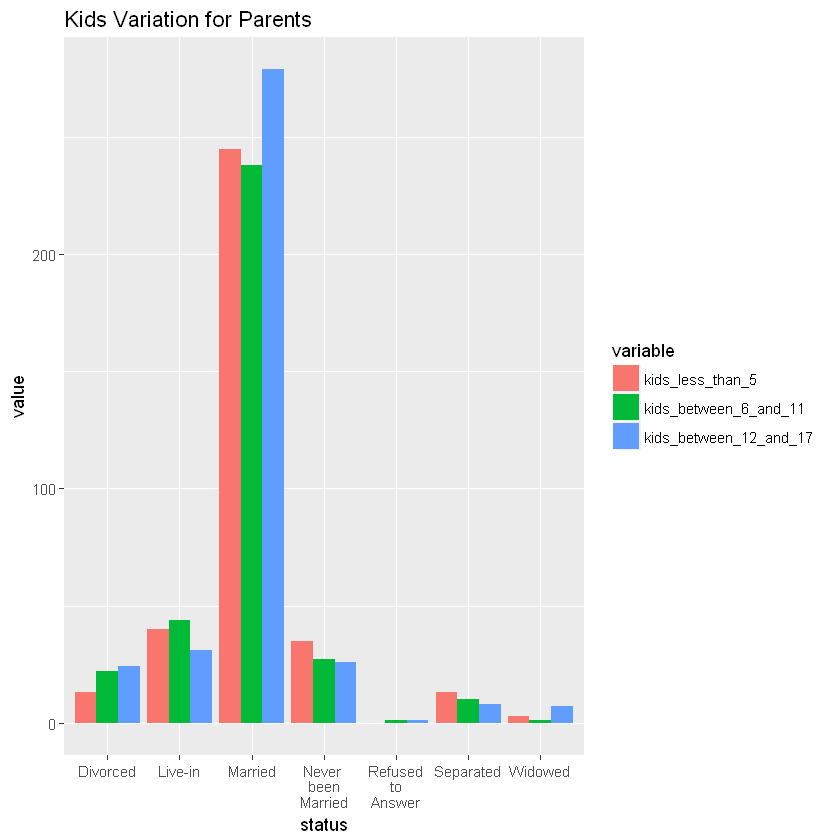

In [361]:
histogram <- melt(kids_age_survey[,c(1,2,3,5)],id='status')
ggplot(histogram, aes(x=status, y=value, fill=variable))+geom_bar(stat='identity', position='dodge')+
labs(title="Kids Variation for Parents")

The plot states that married poeple have the greatest number of kids and then live in and divorced.

Question 2: The men and women distribution at different types of work places
          eg. How many men and women work at large cooperation

Queries to evaluate the above question

In [363]:
men_df <- sqldf("select emptype1 as Company,count(*) as men from dataDF where sex=1 and emptype1=1
       union
       select emptype1 as Company,count(*) as men from dataDF where sex=1 and emptype1=2
       union
       select emptype1 as Company,count(*) as men from dataDF where sex=1 and emptype1=3
       union
       select emptype1 as Company,count(*) as men from dataDF where sex=1 and emptype1=4
       union
       select emptype1 as Company,count(*) as men from dataDF where sex=1 and emptype1=5
       union
       select emptype1 as Company,count(*) as men from dataDF where sex=1 and emptype1=6
       union
       select emptype1 as Company,count(*) as men from dataDF where (emptype1=7 
       or emptype1=8 or emptype1=98 or emptype1=99) and sex=1")

data frame consisting of details for men. Adding the defintion for each of the company type

In [364]:
men_df["Type"] <- c("Large_Coop","Medium_Coop","Business","Govt","Edu_Inst","NGO","Others")

In [365]:
men_df

Company,men,Type
1,191,Large_Coop
2,114,Medium_Coop
3,169,Business
4,54,Govt
5,38,Edu_Inst
6,32,NGO
8,26,Others


In [366]:
women_df <- sqldf("select emptype1 as Company,count(*) as women from dataDF where sex=2 and emptype1=1
       union
       select emptype1 as Company,count(*) as women from dataDF where sex=2 and emptype1=2
       union
       select emptype1 as Company,count(*) as women from dataDF where sex=2 and emptype1=3
       union
       select emptype1 as Company,count(*) as women from dataDF where sex=2 and emptype1=4
       union
       select emptype1 as Company,count(*) as women from dataDF where sex=2 and emptype1=5
       union
       select emptype1 as Company,count(*) as women from dataDF where sex=2 and emptype1=6
       union
       select emptype1 as Company,count(*) as women from dataDF where(emptype1=7 
       or emptype1=8 or emptype1=98 or emptype1=99) and sex=2")

Data frame consisting the details for women. Adding the definition for each of the work place

In [379]:
women_df["Type"] <- c("Large_Coop","Medium_Coop","Business","Govt","Edu_Inst","NGO","Others")

Merging both the data frames into one

In [380]:
company_df <- merge(men_df,women_df,by='Type')

In [381]:
company_df

Type,Company.x,men,Company.y,women
Business,3,169,3,97
Edu_Inst,5,38,5,80
Govt,4,54,4,36
Large_Coop,1,191,1,133
Medium_Coop,2,114,2,51
NGO,6,32,6,51
Others,8,26,7,28


In [382]:
company_df <- subset(company_df, select = -c(Company.x,Company.y) )

Final data frame consisting of men/women distribution for different work places

In [371]:
company_df

Type,men,women
Business,169,97
Edu_Inst,38,80
Govt,54,36
Large_Coop,191,133
Medium_Coop,114,51
NGO,32,51
Others,26,28


Plot for the above data frame

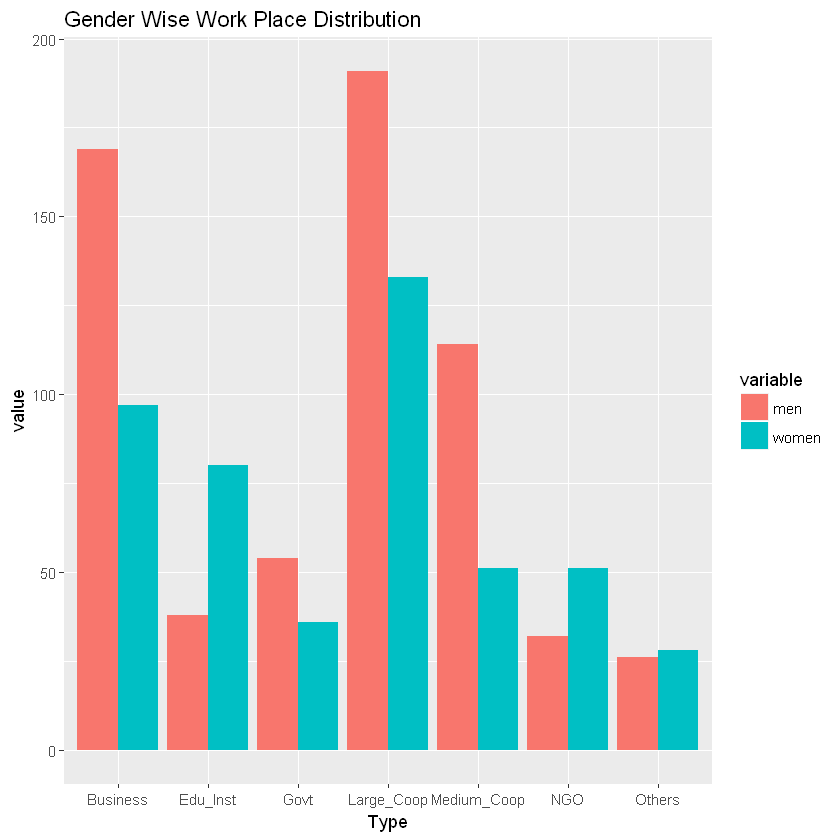

In [383]:
histogram <- melt(company_df[,c(1,2,3)],id='Type')
ggplot(histogram, aes(x=Type, y=value, fill=variable))+geom_bar(stat='identity', position='dodge')+
labs(title="Gender Wise Work Place Distribution")

The above plot states that places like Large,Medium Cooperation, Business Ventures, Government seats 
have greater number of men than women. 
However places like NGO, Education Insititution have greater number of women employees than men

Question 3: What is the distrtibution of people as per their political views and race
          For instance, number of White democrats/republicans

Queries for the above question

In [277]:
democratDF <- sqldf("select race,count(*) as democrat from dataDF where race=1 and  party=1
       union
       select race,count(*) as democrat from dataDF where race=2 and party=1
       union
       select race,count(*) as democrat from dataDF where race=3 and party=1
       union
       select race,count(*) as democrat from dataDF where race=4 and party=1
       union
       select race,count(*) as democrat from dataDF where race=5 and party=1
       union
       select race,count(*) as democrat from dataDF where (race=6 or race=8 or race=9) and party=1
       ")

Data frame consisting of detaisl for no of democrats for each race. Adding each race description

In [278]:
democratDF["Race_Class"] <- c("White","African-American","Asian","Mixed Race","Native American ","Others")

In [384]:
democratDF

race,democrat,Race_Class
1,395,White
2,17,African-American
3,11,Asian
4,4,Mixed Race
5,4,Native American
6,12,Others


In [279]:
republicanDF <- sqldf("select race,count(*) as republican from dataDF where race=1 and  party=2
       union
       select race,count(*) as republican from dataDF where race=2 and party=2
       union
       select race,count(*) as republican from dataDF where race=3 and party=2
       union
       select race,count(*) as republican from dataDF where race=4 and party=2
       union
       select race,count(*) as republican from dataDF where race=5 and party=2
       union
       select race,count(*) as republican from dataDF where (race=6 or race=8 or race=9) and party=2
       ")

Data frame consisting the details for republicans. 

In [280]:
republicanDF["Race_Class"] <- c("White","African-American","Asian","Mixed Race","Native American ","Others")

In [281]:
independentDF <- sqldf("select race,count(*) as independent from dataDF where race=1 and  party=3
       union
       select race,count(*) as independent from dataDF where race=2 and party=3
       union
       select race,count(*) as independent from dataDF where race=3 and party=3
       union
       select race,count(*) as independent from dataDF where race=4 and party=3
       union
       select race,count(*) as independent from dataDF where race=5 and party=3
       union
       select race,count(*) as independent from dataDF where (race=6 or race=8 or race=9) and party=3
       ")

In [282]:
independentDF["Race_Class"] <- c("White","African-American","Asian","Mixed Race","Native American ","Others")

Mergind the data frames for all the parties

In [385]:
party_race_df <- merge(democratDF,republicanDF,by='Race_Class')

In [284]:
party_race_df <- merge(party_race_df,independentDF,by='Race_Class')

In [285]:
party_race_df

Race_Class,race.x,democrat,race.y,republican,race,independent
African-American,2,17,2,140,2,63
Asian,3,11,3,13,3,20
Mixed Race,4,4,4,15,4,20
Native American,5,4,5,6,5,5
Others,6,12,6,34,9,37
White,1,395,1,409,1,541


In [286]:
party_race_df <- subset(party_race_df, select = -c(race.x,race.y) )

Final data frame consisting of the parties and races

In [287]:
party_race_df

Race_Class,democrat,republican,race,independent
African-American,17,140,2,63
Asian,11,13,3,20
Mixed Race,4,15,4,20
Native American,4,6,5,5
Others,12,34,9,37
White,395,409,1,541


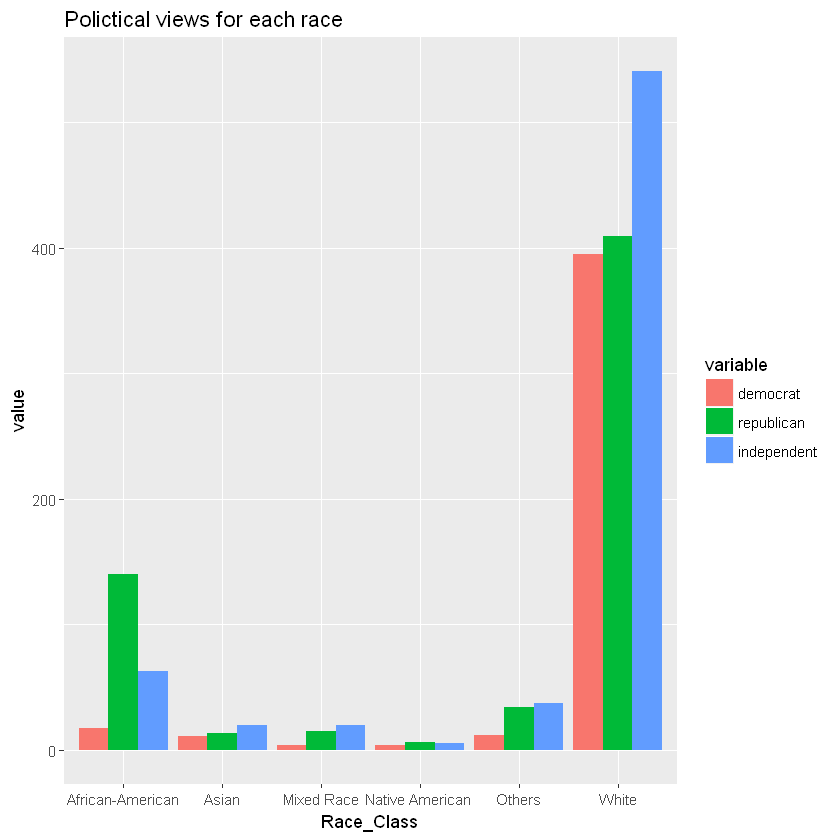

In [289]:
histogram <- melt(party_race_df[,c(1,2,3,5)],id='Race_Class')
ggplot(histogram, aes(x=Race_Class, y=value, fill=variable))+geom_bar(stat='identity', position='dodge')+
labs(title="Polictical views for each race")

Question 4: How many dating app users are there as per age groups.

Queries for the above question

In [293]:
ageDF <- sqldf("select age,count(*) as no_of_people from dataDF where age>=18 and age<=30 and date2a=1
       union
       select age,count(*) as no_of_people from dataDF where age>30 and age<=40 and date2a=1
       union
       select age,count(*) as no_of_people from dataDF where age>40 and age<=50 and date2a=1
       union
       select age,count(*) as no_of_people from dataDF where age>50 and age<=60 and date2a=1
       union
       select age,count(*) as no_of_people from dataDF where age>60 and age<=70 and date2a=1
       union
       select age,count(*) as no_of_people from dataDF where age>70 and age<=80 and date2a=1
       union
       select age,count(*) as no_of_people from dataDF where age>70 and age<=80 and date2a=1
       union
       select age,count(*) as no_of_people from dataDF where age>80 and age<=90 and date2a=1
       union
       select age,count(*) as no_of_people from dataDF where age>90 and age<=99 and date2a=1")

In [294]:
ageDF <- na.omit(ageDF)

In [295]:
ageDF["Age_Range"] <- c("18-30","31-40","41-50","51-60","61-70","71-80","91-99")

Final data frame with age intervals creates and their respective dating app users

In [296]:
ageDF

,age,no_of_people,Age_Range
2,23,68,18-30
3,35,22,31-40
4,43,24,41-50
5,60,14,51-60
6,67,8,61-70
7,77,1,71-80
8,98,1,91-99


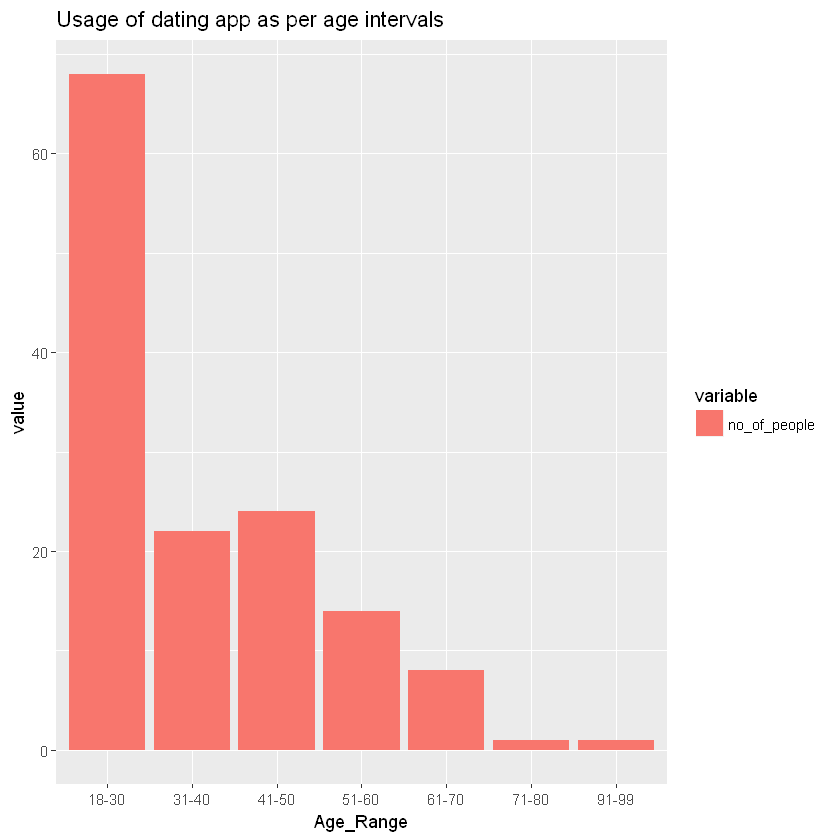

In [298]:
histogram <- melt(ageDF[,c(2,3)],id='Age_Range')
ggplot(histogram, aes(x=Age_Range, y=value, fill=variable))+geom_bar(stat='identity', position='dodge')+
labs(title="Usage of dating app as per age intervals")

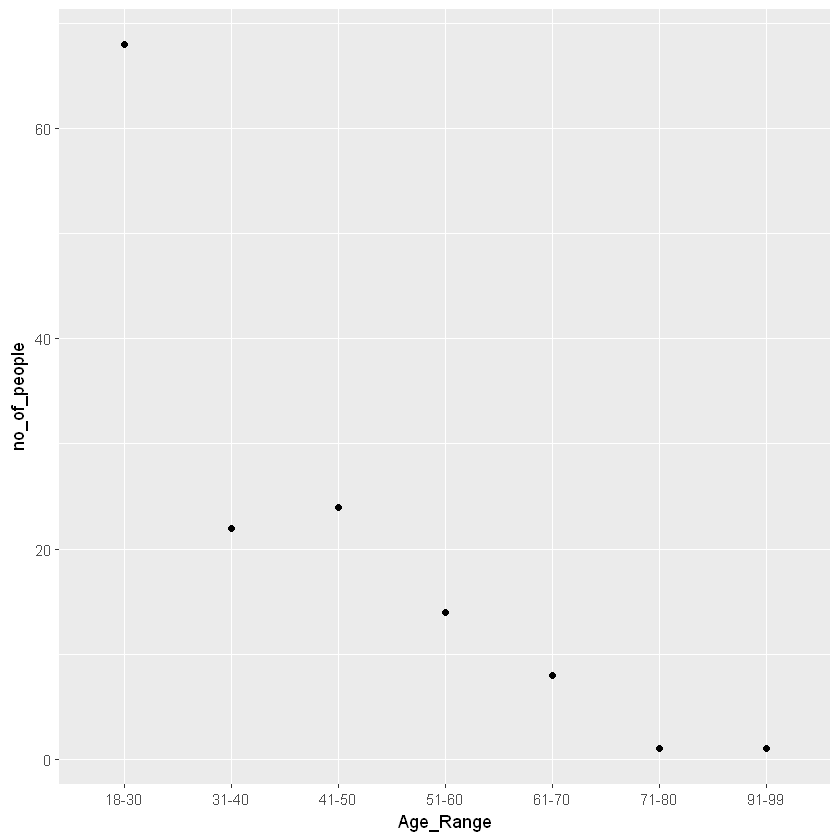

In [313]:
ggplot(ageDF, aes(x = Age_Range, y = no_of_people)) +
  geom_point()

The above plot infers that younsters use the dating app the most and the usage
gradually decreases with increase in age

Question 5: What is the distribution of income as per the type of job.
           for example: Which job fetches the most income

Queries for the above question

Creating a separate data frame for each income range and job type pair. Hence 45 data frames.

In [334]:
lessthan10_prdf <- sqldf("Select inc,count(*) as Professional from dataDF where inc=1 and emptype3=1")
lessthan10_madf <- sqldf("Select inc,count(*) as Manager from dataDF where inc=1 and emptype3=2")
lessthan10_godf <- sqldf("Select inc,count(*) as Govt_Official from dataDF where inc=1 and emptype3=3")
lessthan10_cldf <- sqldf("Select inc,count(*) as Clerical from dataDF where inc=1 and emptype3=4")
lessthan10_cudf <- sqldf("Select inc,count(*) as Customer_service from dataDF where inc=1 and emptype3=5")

between10and20_prdf <- sqldf("Select inc,count(*) as Professional from dataDF where inc=2 and emptype3=1")
between10and20_madf <- sqldf("Select inc,count(*) as Manager from dataDF where inc=2 and emptype3=2")
between10and20_godf <- sqldf("Select inc,count(*) as Govt_Official from dataDF where inc=2 and emptype3=3")
between10and20_cldf <- sqldf("Select inc,count(*) as Clerical from dataDF where inc=2 and emptype3=4")
between10and20_cudf <- sqldf("Select inc,count(*) as Customer_service from dataDF where inc=2 and emptype3=5")

between20and30_prdf <- sqldf("Select inc,count(*) as Professional from dataDF where inc=3 and emptype3=1")
between20and30_madf <- sqldf("Select inc,count(*) as Manager from dataDF where inc=3 and emptype3=2")
between20and30_godf <- sqldf("Select inc,count(*) as Govt_Official from dataDF where inc=3 and emptype3=3")
between20and30_cldf <- sqldf("Select inc,count(*) as Clerical from dataDF where inc=3 and emptype3=4")
between20and30_cudf <- sqldf("Select inc,count(*) as Customer_service from dataDF where inc=3 and emptype3=5")

between30and40_prdf <- sqldf("Select inc,count(*) as Professional from dataDF where inc=4 and emptype3=1")
between30and40_madf <- sqldf("Select inc,count(*) as Manager from dataDF where inc=4 and emptype3=2")
between30and40_godf <- sqldf("Select inc,count(*) as Govt_Official from dataDF where inc=4 and emptype3=3")
between30and40_cldf <- sqldf("Select inc,count(*) as Clerical from dataDF where inc=4 and emptype3=4")
between30and40_cudf <- sqldf("Select inc,count(*) as Customer_service from dataDF where inc=4 and emptype3=5")

between40and50_prdf <- sqldf("Select inc,count(*) as Professional from dataDF where inc=5 and emptype3=1")
between40and50_madf <- sqldf("Select inc,count(*) as Manager from dataDF where inc=5 and emptype3=2")
between40and50_godf <- sqldf("Select inc,count(*) as Govt_Official from dataDF where inc=5 and emptype3=3")
between40and50_cldf <- sqldf("Select inc,count(*) as Clerical from dataDF where inc=5 and emptype3=4")
between40and50_cudf <- sqldf("Select inc,count(*) as Customer_service from dataDF where inc=5 and emptype3=5")

between50and75_prdf <- sqldf("Select inc,count(*) as Professional from dataDF where inc=6 and emptype3=1")
between50and75_madf <- sqldf("Select inc,count(*) as Manager from dataDF where inc=6 and emptype3=2")
between50and75_godf <- sqldf("Select inc,count(*) as Govt_Official from dataDF where inc=6 and emptype3=3")
between50and75_cldf <- sqldf("Select inc,count(*) as Clerical from dataDF where inc=6 and emptype3=4")
between50and75_cudf <- sqldf("Select inc,count(*) as Customer_service from dataDF where inc=6 and emptype3=5")

between75and100_prdf <- sqldf("Select inc,count(*) as Professional from dataDF where inc=7 and emptype3=1")
between75and100_madf <- sqldf("Select inc,count(*) as Manager from dataDF where inc=7 and emptype3=2")
between75and100_godf <- sqldf("Select inc,count(*) as Govt_Official from dataDF where inc=7 and emptype3=3")
between75and100_cldf <- sqldf("Select inc,count(*) as Clerical from dataDF where inc=7 and emptype3=4")
between75and100_cudf <- sqldf("Select inc,count(*) as Customer_service from dataDF where inc=7 and emptype3=5")

between100and150_prdf <- sqldf("Select inc,count(*) as Professional from dataDF where inc=8 and emptype3=1")
between100and150_madf <- sqldf("Select inc,count(*) as Manager from dataDF where inc=8 and emptype3=2")
between100and150_godf <- sqldf("Select inc,count(*) as Govt_Official from dataDF where inc=8 and emptype3=3")
between100and150_cldf <- sqldf("Select inc,count(*) as Clerical from dataDF where inc=8 and emptype3=4")
between100and150_cudf <- sqldf("Select inc,count(*) as Customer_service from dataDF where inc=8 and emptype3=5")

above150_Prdf <- sqldf("Select inc,count(*) as Professional from dataDF where inc=9 and emptype3=1")
above150_Madf <- sqldf("Select inc,count(*) as Manager from dataDF where inc=9 and emptype3=2")
above150_Godf <- sqldf("Select inc,count(*) as Govt_Official from dataDF where inc=9 and emptype3=3")
above150_Cldf <- sqldf("Select inc,count(*) as Clerical from dataDF where inc=9 and emptype3=4")
above150_Cudf <- sqldf("Select inc,count(*) as Customer_service from dataDF where inc=9 and emptype3=5")

Joining all the data frames as per the income range, such that we have one one data frame for each income range

In [336]:
lessthan10 <- sqldf("Select lessthan10_prdf.inc,lessthan10_prdf.Professional,lessthan10_madf.Manager,lessthan10_godf.Govt_Official,
      lessthan10_cldf.Clerical,lessthan10_cudf.Customer_service
      from lessthan10_prdf
      left join 
      lessthan10_madf
      on lessthan10_prdf.inc=lessthan10_madf.inc
      left join  lessthan10_godf
      on lessthan10_prdf.inc=lessthan10_godf.inc
      left join lessthan10_cldf
      on lessthan10_prdf.inc=lessthan10_cldf.inc
      left join lessthan10_cudf
      on lessthan10_prdf.inc=lessthan10_cudf.inc")
between10and20 <- sqldf("Select between10and20_prdf.inc,between10and20_prdf.Professional,between10and20_madf.Manager,between10and20_godf.Govt_Official,
      between10and20_cldf.Clerical,between10and20_cudf.Customer_service
      from between10and20_prdf
      left join 
      between10and20_madf
      on between10and20_prdf.inc=between10and20_madf.inc
      left join  between10and20_godf
      on between10and20_prdf.inc=between10and20_godf.inc
      left join between10and20_cldf
      on between10and20_prdf.inc=between10and20_cldf.inc
      left join between10and20_cudf
      on between10and20_prdf.inc=between10and20_cudf.inc")
between20and30<- sqldf("Select between20and30_prdf.inc,between20and30_prdf.Professional,between20and30_madf.Manager,
      between20and30_godf.Govt_Official,
      between20and30_cldf.Clerical,between20and30_cudf.Customer_service
      from between20and30_prdf
      left join 
      between20and30_madf
      on between20and30_prdf.inc=between20and30_madf.inc
      left join  between20and30_godf
      on between20and30_prdf.inc=between20and30_godf.inc
      left join between20and30_cldf
      on between20and30_prdf.inc=between20and30_cldf.inc
      left join between20and30_cudf
      on between20and30_prdf.inc=between20and30_cudf.inc")
between30and40 <- sqldf("Select between30and40_prdf.inc,between30and40_prdf.Professional,between30and40_madf.Manager,
      between30and40_godf.Govt_Official,
      between30and40_cldf.Clerical,between30and40_cudf.Customer_service
      from between30and40_prdf
      left join 
      between30and40_madf
      on between30and40_prdf.inc=between30and40_madf.inc
      left join  between30and40_godf
      on between30and40_prdf.inc=between30and40_godf.inc
      left join between30and40_cldf
      on between30and40_prdf.inc=between30and40_cldf.inc
      left join between30and40_cudf
      on between30and40_prdf.inc=between30and40_cudf.inc")
between40and50 <- sqldf("Select between40and50_prdf.inc,between40and50_prdf.Professional,between40and50_madf.Manager,
      between40and50_godf.Govt_Official,
      between40and50_cldf.Clerical,between40and50_cudf.Customer_service
      from between40and50_prdf
      left join 
      between40and50_madf
      on between40and50_prdf.inc=between40and50_madf.inc
      left join  between40and50_godf
      on between40and50_prdf.inc=between40and50_godf.inc
      left join between40and50_cldf
      on between40and50_prdf.inc=between40and50_cldf.inc
      left join between40and50_cudf
      on between40and50_prdf.inc=between40and50_cudf.inc")
between50and75 <- sqldf("Select between50and75_prdf.inc,between50and75_prdf.Professional,between50and75_madf.Manager,
      between50and75_godf.Govt_Official,
      between50and75_cldf.Clerical,between50and75_cudf.Customer_service
      from between50and75_prdf
      left join 
      between50and75_madf
      on between50and75_prdf.inc=between50and75_madf.inc
      left join  between50and75_godf
      on between50and75_prdf.inc=between50and75_godf.inc
      left join between50and75_cldf
      on between50and75_prdf.inc=between50and75_cldf.inc
      left join between50and75_cudf
      on between50and75_prdf.inc=between50and75_cudf.inc")
between75and100 <- sqldf("Select between75and100_prdf.inc,between75and100_prdf.Professional,between75and100_madf.Manager,
      between75and100_godf.Govt_Official,
      between75and100_cldf.Clerical,between75and100_cudf.Customer_service
      from between75and100_prdf
      left join 
      between75and100_madf
      on between75and100_prdf.inc=between75and100_madf.inc
      left join  between75and100_godf
      on between75and100_prdf.inc=between75and100_godf.inc
      left join between75and100_cldf
      on between75and100_prdf.inc=between75and100_cldf.inc
      left join between75and100_cudf
      on between75and100_prdf.inc=between75and100_cudf.inc")
between100and150 <- sqldf("Select between100and150_prdf.inc,between100and150_prdf.Professional,between100and150_madf.Manager,
      between100and150_godf.Govt_Official,
      between100and150_cldf.Clerical,between100and150_cudf.Customer_service
      from between100and150_prdf
      left join 
      between100and150_madf
      on between100and150_prdf.inc=between100and150_madf.inc
      left join  between100and150_godf
      on between100and150_prdf.inc=between100and150_godf.inc
      left join between100and150_cldf
      on between100and150_prdf.inc=between100and150_cldf.inc
      left join between100and150_cudf
      on between100and150_prdf.inc=between100and150_cudf.inc")
above150 <- sqldf("Select above150_Prdf.inc,above150_Prdf.Professional,above150_Madf.Manager,above150_Godf.Govt_Official,
      above150_Cldf.Clerical,above150_Cudf.Customer_service
      from above150_Prdf
      left join 
      above150_Madf
      on above150_Prdf.inc=above150_Madf.inc
      left join  above150_Godf
      on above150_Prdf.inc=above150_Godf.inc
      left join above150_Cldf
      on above150_Prdf.inc=above150_Cldf.inc
      left join above150_Cudf
      on above150_Prdf.inc=above150_Cudf.inc")

Union for all the data frames such that we finally have all the details in one table

In [338]:
income_job_df <- sqldf("Select * from lessthan10
       union
       Select * from between10and20
       union
       Select * from between20and30
       union
       Select * from between30and40
     union
      Select * from between40and50
      union 
       Select * from between50and75
     union
     Select * from between75and100
     union
     Select * from between100and150
     union
     Select * from above150")

In [348]:
income_job_df["Income_Range"] <- c("Less\nthan\n 10k","B/w\n10k\nand\n20k",
                                   "B/w\n20k\nand\n30k","B/w\n30k\nand\n40k",
                                   "B/w\n40k\nand\n50k","B/w\n50k\nand\n75k",
                                   "B/w\n75k\nand\n100k","B/w\n100k\nand\n150k","Above\n150k")

Final data frame which has the number of people for each type of profession within each range of income

In [346]:
income_job_df

inc,Professional,Manager,Govt_Official,Clerical,Customer_service,Income_Range
1,5,2,1,2,5,Less than 10k
2,9,1,NA,2,7,B/w 10k and 20k
3,12,2,NA,4,14,B/w 20k and 30k
4,19,2,NA,4,13,B/w 30k and 40k
5,26,3,1,7,13,B/w 40k and 50k
6,58,18,2,15,11,B/w 50k and 75k
7,47,20,1,11,9,B/w 75k and 100k
8,63,34,2,8,5,B/w 100k and 150k
9,72,26,1,5,3,Above 150k


Warning message:
"Removed 3 rows containing missing values (geom_bar)."

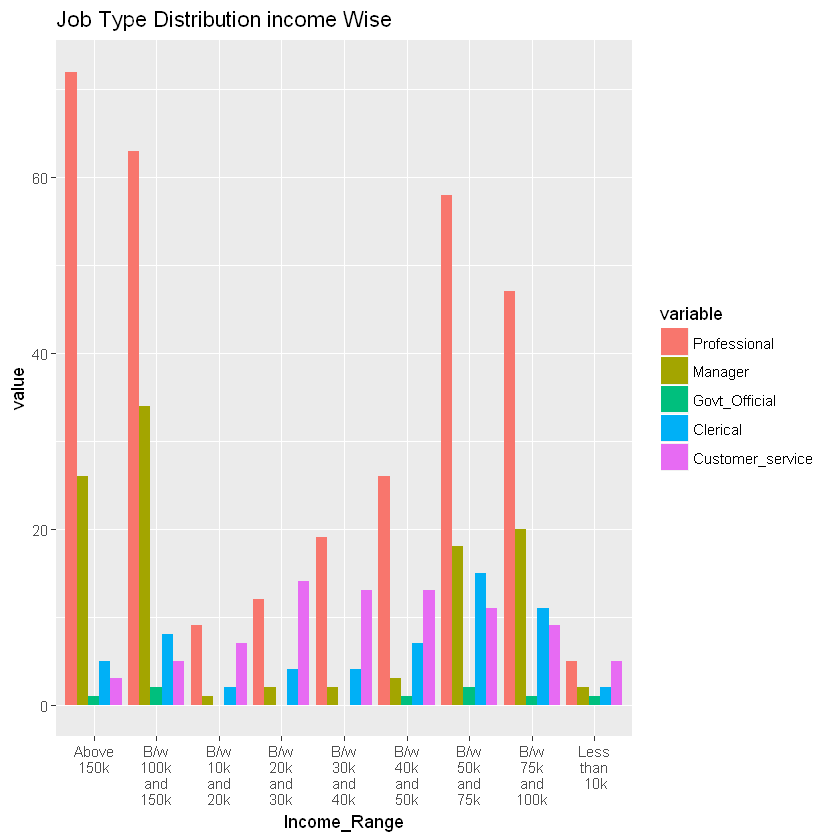

In [349]:
histogram <- melt(income_job_df[,c(2,3,4,5,6,7)],id='Income_Range')
ggplot(histogram, aes(x=Income_Range, y=value, fill=variable))+geom_bar(stat='identity', position='dodge')+
labs(title="Job Type Distribution income Wise")

The above plot states that all the job types incur the maximum salary but the professionals are greater in number
as compared to other job types.